# Actividad 1. Visualización utilizando Matplotlib y Seaborn

In [1]:
# ─────────────────────────────────────────────────────────────────────────────                                                                       
# Script Name : Act1.py
# Author      : Dilan Castañeda, Ana Lucia Teran, Diego Govea, Daniel Lozano                                             
# Created On  : November 6, 2024          
# Last Update : November 7, 2024                                    
# Version     : 1.0.0                                          
# Description : Practice Matplotlib and Seaborn thorugh an EDA of a Amazon Reviews dataset to find a problem to solve.
# ─────────────────────────────────────────────────────────────────────────────

## 1. Exploratory Data Analysis (EDA)

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tabulate as tb
import math

In [3]:
reviews = pd.read_excel('Reviews_AMZ.xlsx')

# Displaying the first 5 rows of the dataset
reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568358 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568417 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [5]:
na_reviews = reviews[(reviews['ProfileName'].isnull() == True) | (reviews['Summary'].isnull() == True)].sort_values(by='Text')
na_reviews


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
283626,283627,B0029JHK1M,A25NI1Z8J4AZDF,"C. R. Starheart ""Crystal Spirit""",6,8,2,1300233600,NaN,Bought this because I read a review about Spry...
38739,38740,B000EGZ9AQ,AIIR8E34EDKCQ,NaN,9,10,5,1202947200,Delish!,Currently I'm on my second jar of this fantast...
358674,358675,B003CIBPN8,A2DEHJJIEAPPBF,NaN,0,0,5,1338940800,Great taste,Enjoy drinking this brand. Tastes as good as ...
268648,268649,B004SRFYMK,A2DEHJJIEAPPBF,NaN,0,0,5,1338940800,Great taste,Enjoy drinking this brand. Tastes as good as ...
211846,211847,B000CNB4LE,A2DEHJJIEAPPBF,NaN,0,0,5,1338940800,Great taste,Enjoy drinking this brand. Tastes as good as ...
...,...,...,...,...,...,...,...,...,...,...
163191,163192,B000CQID1A,AGT3BYX5P9SLH,NaN,0,0,5,1324684800,awesome,i love them they are amazing I would eat them ...
137613,137614,B000CQE3HS,AGT3BYX5P9SLH,NaN,0,0,5,1324684800,awesome,i love them they are amazing I would eat them ...
490412,490413,B000CQE3IC,AGT3BYX5P9SLH,NaN,0,0,5,1324684800,awesome,i love them they are amazing I would eat them ...
560446,560447,B000CQID1K,AGT3BYX5P9SLH,NaN,0,0,5,1324684800,awesome,i love them they are amazing I would eat them ...


In [6]:
# Drop duplicates by 'Text' column and keep the first occurrence and verify is is there is any null value
reviews.drop_duplicates(subset='Text', keep='first', inplace=True)
print(reviews.isnull().sum())

na_reviews = reviews[(reviews['ProfileName'].isnull() == True) | (reviews['Summary'].isnull() == True)].sort_values(by='Text')

# Drop rows with null values
reviews.dropna(inplace=True)

reviews.info()

# Convert 'Time' column to datetime
reviews['Date'] = pd.to_datetime(reviews['Time'], unit='s')


Id                         0
ProductId                  0
UserId                     0
ProfileName               61
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   10
Text                       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 393508 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      393508 non-null  int64 
 1   ProductId               393508 non-null  object
 2   UserId                  393508 non-null  object
 3   ProfileName             393508 non-null  object
 4   HelpfulnessNumerator    393508 non-null  int64 
 5   HelpfulnessDenominator  393508 non-null  int64 
 6   Score                   393508 non-null  int64 
 7   Time                    393508 non-null  int64 
 8   Summary                 393508 non-null  object
 9   Tex

In [7]:
# Display counters of unique values in each column
for column in reviews.columns:
    print(f'{column}: {reviews[column].nunique()}')

Id: 393508
ProductId: 67549
UserId: 256011
ProfileName: 218377
HelpfulnessNumerator: 230
HelpfulnessDenominator: 233
Score: 5
Time: 3167
Summary: 294645
Text: 393508
Date: 3167


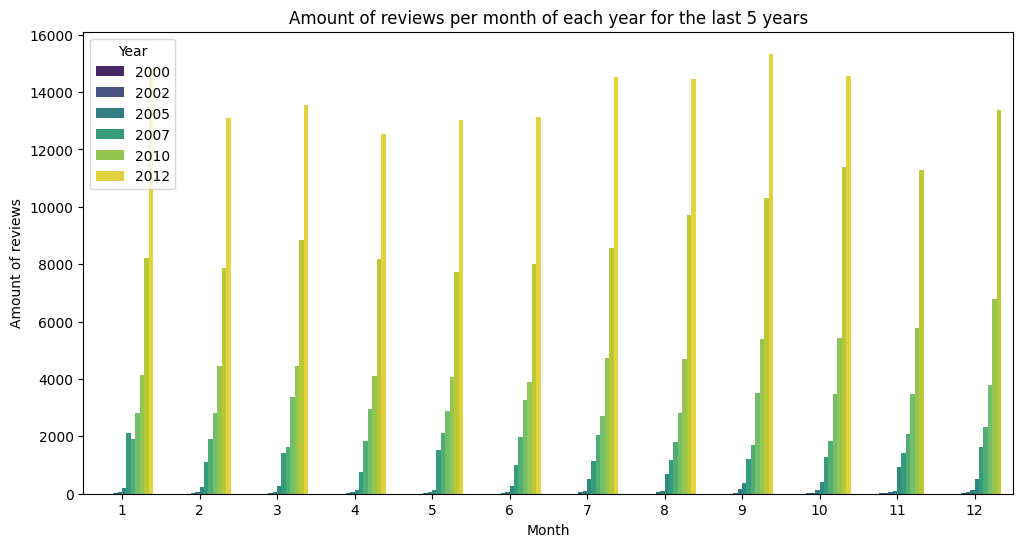

In [8]:
# Time series analysis
reviews['Date'].min(), reviews['Date'].max()

# Print amount of reviews per year
reviews['Date'].dt.year.value_counts().sort_index()

# Grid with amount of reviews per month of each year for the last 5 years
fig = plt.figure(figsize=(12, 6))
sns.countplot(data=reviews, x=reviews['Date'].dt.month, hue=reviews['Date'].dt.year, palette='viridis')
plt.title('Amount of reviews per month of each year for the last 5 years')
plt.xlabel('Month')
plt.ylabel('Amount of reviews')
plt.legend(title='Year')
plt.show()


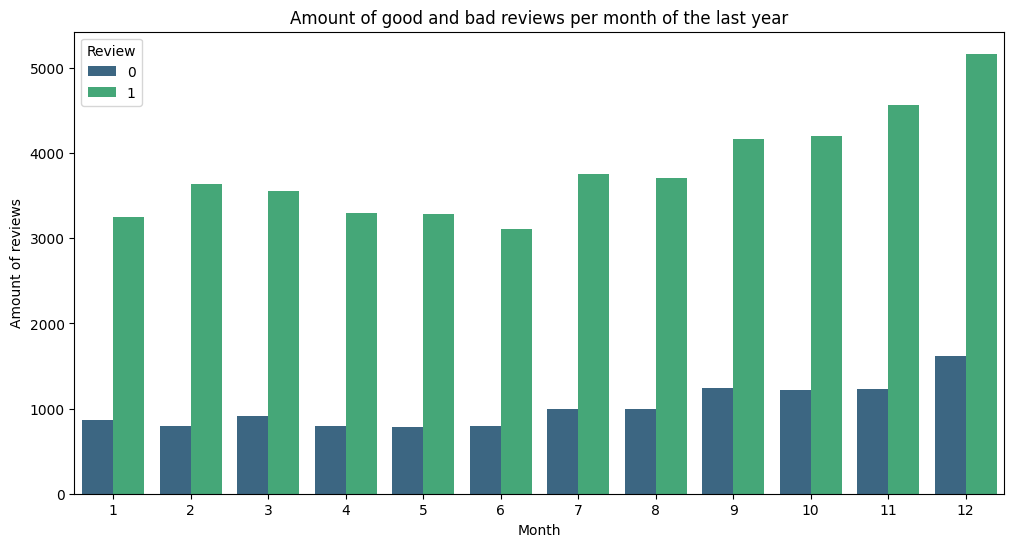

C:\Users\dilan\AppData\Local\Temp\ipykernel_4660\3704837116.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=reviews[reviews['Year'] == 2010], x='Month', y='Helpfulness', palette='viridis')


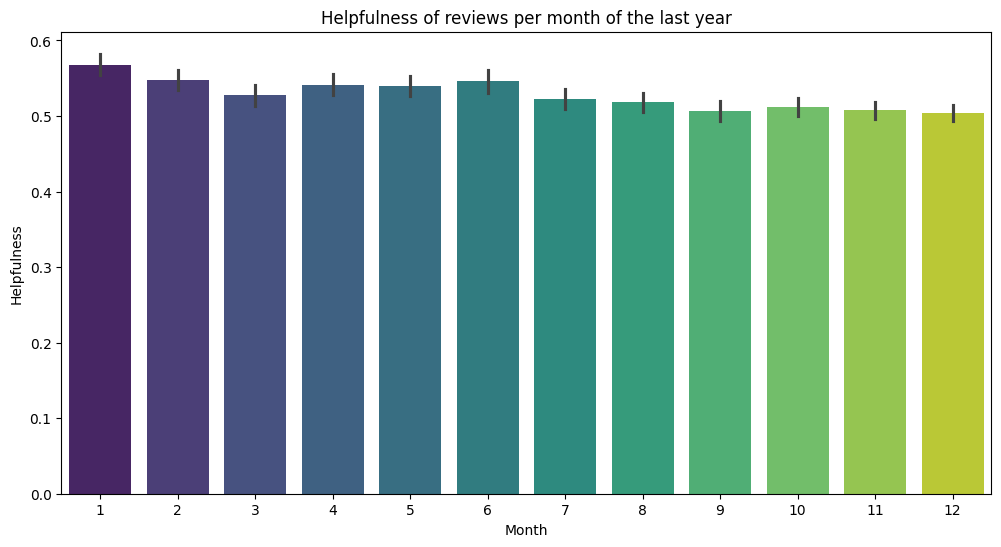

In [9]:
# Good reviews, bad reviews and Helpfulness in the last year
reviews['Year'] = reviews['Date'].dt.year
reviews['Month'] = reviews['Date'].dt.month
reviews['Day'] = reviews['Date'].dt.day
reviews['Helpfulness'] = reviews['HelpfulnessNumerator'] / reviews['HelpfulnessDenominator']
reviews['Helpfulness'] = reviews['Helpfulness'].fillna(0)
reviews['Helpfulness_binary'] = reviews['Helpfulness'].apply(lambda x: 1 if x > 0.5 else 0)
reviews['GoodReview'] = reviews['Score'].apply(lambda x: 1 if x > 3 else 0)
reviews['NeutralReview'] = reviews['Score'].apply(lambda x: 1 if x == 3 else 0)

# Plotting the amount of good and bad reviews per month of the last year
fig = plt.figure(figsize=(12, 6))
sns.countplot(data=reviews[reviews['Year'] == 2010], x='Month', hue='GoodReview', palette='viridis')
plt.title('Amount of good and bad reviews per month of the last year')
plt.xlabel('Month')
plt.ylabel('Amount of reviews')
plt.legend(title='Review')
plt.show()

# Plotting the helpfulness of reviews per month of the last year
fig = plt.figure(figsize=(12, 6))
sns.barplot(data=reviews[reviews['Year'] == 2010], x='Month', y='Helpfulness', palette='viridis')
plt.title('Helpfulness of reviews per month of the last year')
plt.xlabel('Month')
plt.ylabel('Helpfulness')
plt.show()


## 2. Problematic found

Encontrar la gente que tiene a solo crear reviews buenas o malas para inflar la calificacion de los productos.

## 3. Deep understanding (graphics)

1% of contributors: 2184

Most reviews
ProfileName
Gary Peterson                             329
C. F. Hill "CFH"                          269
Rebecca of Amazon "The Rebecca Review"    242
Chris                                     218
c2                                        211
                                         ... 
Marney                                     14
nodice                                     14
In the AmaZone...                          14
rita                                       14
Meredith                                   14
Name: count, Length: 2184, dtype: int64

Less helpful reviews
ProfileName
Gary Peterson       217
Chris               147
C. F. Hill "CFH"    142
Mike                120
Linda               115
                   ... 
Kiwi                  9
drew                  9
CK                    9
Lola                  9
Lois                  9
Name: count, Length: 2184, dtype: int64


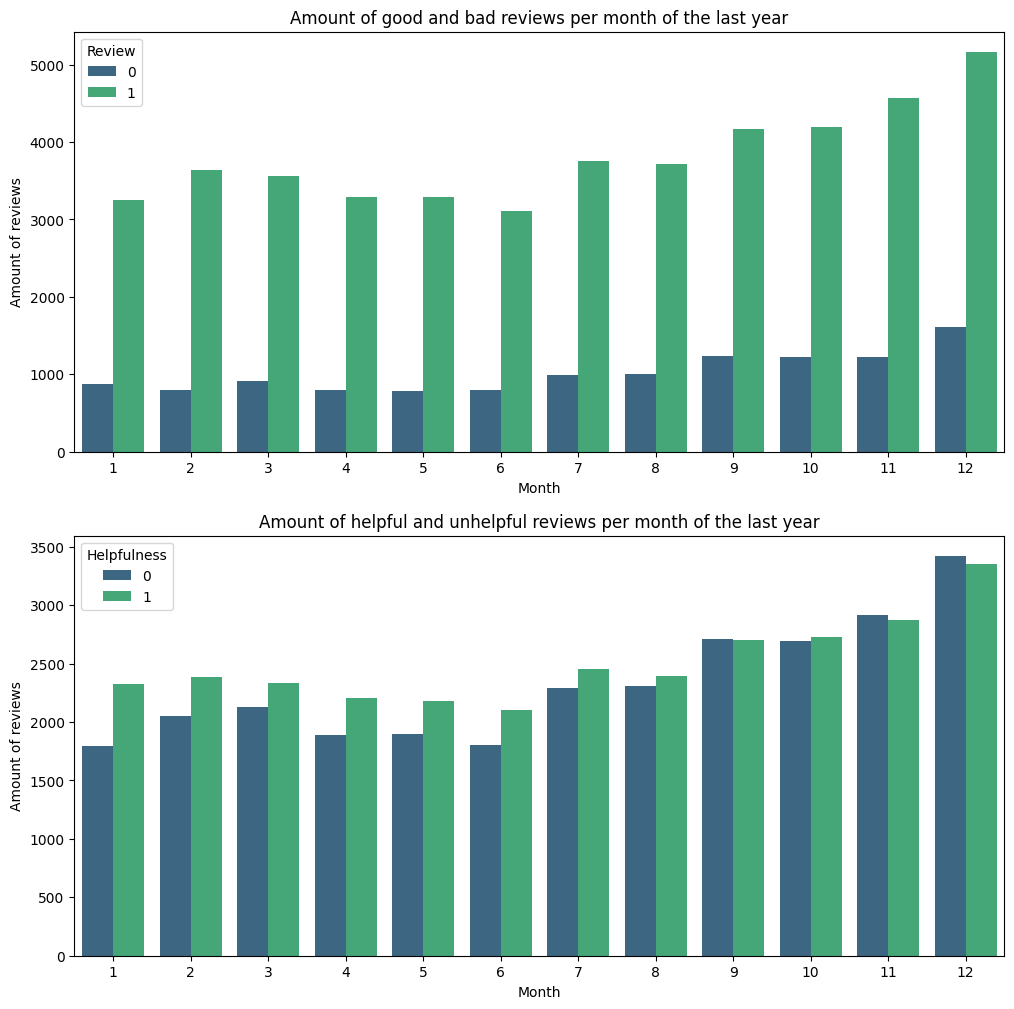

In [10]:
# Compute the 1% of contributors on 2010
num_people = math.ceil(reviews['ProfileName'].nunique() * 0.01)
print(f'1% of contributors: {num_people}')

# People with the most reviews
most_reviews = reviews['ProfileName'].value_counts().head(num_people)
print("\nMost reviews")
print(most_reviews)

# People with less helpful reviews
less_helpful = reviews[reviews['Helpfulness_binary'] == 0]['ProfileName'].value_counts().head(num_people)
print("\nLess helpful reviews")
print(less_helpful)

# Graphic of the amount of reviews per person in the last year
# Plotting the amount of good and bad reviews per month of the last year
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

sns.countplot(data=reviews[reviews['Year'] == 2010], x='Month', hue='GoodReview', palette='viridis', ax=ax[0])
ax[0].set_title('Amount of good and bad reviews per month of the last year')
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Amount of reviews')
ax[0].legend(title='Review')

# Plotting the amount of unhelful reviews in the last year
sns.countplot(data=reviews[(reviews['Year'] == 2010)], x='Month', hue='Helpfulness_binary', palette='viridis', ax=ax[1])
ax[1].set_title('Amount of helpful and unhelpful reviews per month of the last year')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Amount of reviews')
ax[1].legend(title='Helpfulness')

plt.show()

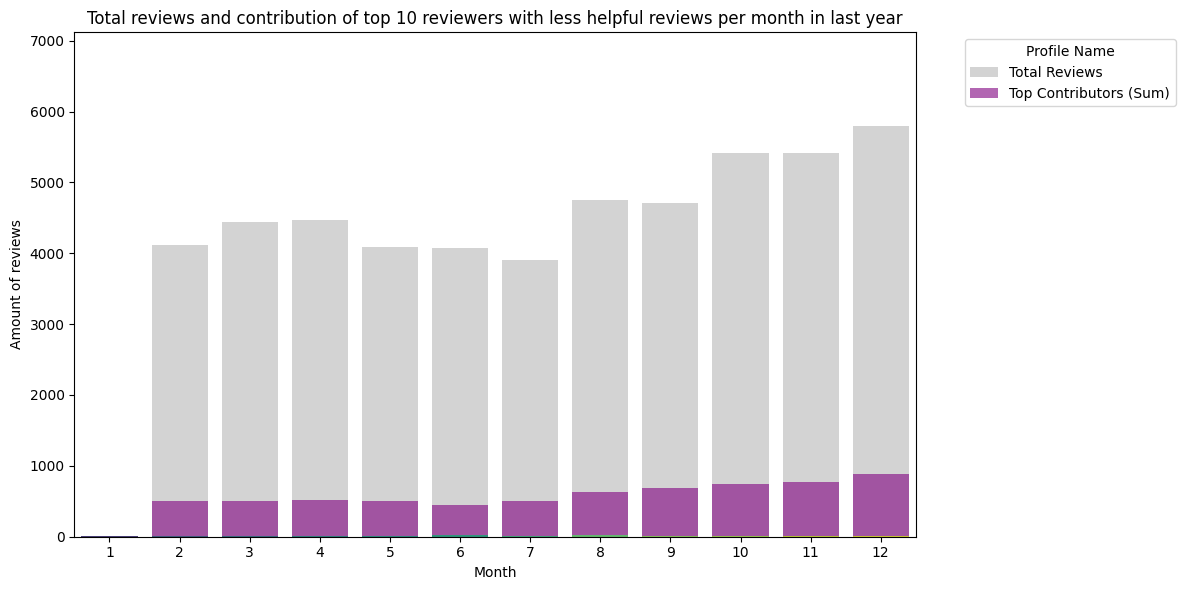

Total reviews: 16.83%


In [14]:
# Plot of total reviews and contribution of top 10 reviewers with less helpful reviews per month in last year
fig, ax = plt.subplots(figsize=(12, 6))

# Filter data from last year
data_last_year = reviews[reviews['Year'] == 2010]

# Total reviews per month
total_reviews_per_month = data_last_year.groupby('Month').size()

# Plot total reviews as a bar plot
ax.bar(total_reviews_per_month.index, total_reviews_per_month, color='lightgray', label='Total Reviews')

# Contribution of top 10 reviewers with less helpful reviews
top_contributors_data = data_last_year[data_last_year['ProfileName'].isin(less_helpful.index)]
top_contributors_per_month = top_contributors_data.groupby('Month').size()

# Overlay the sum of all top contributors on the bar plot
ax.bar(top_contributors_per_month.index, top_contributors_per_month, color='purple', alpha=0.6, label='Top Contributors (Sum)')

sns.countplot(
    data=top_contributors_data, 
    x='Month', 
    hue='ProfileName', 
    palette='viridis', 
    dodge=False,  # Ensure reviewers are stacked properly over the bars
    ax=ax,
    legend=False
)

plt.title('Total reviews and contribution of top 10 reviewers with less helpful reviews per month in last year')
plt.xlabel('Month')
plt.ylabel('Amount of reviews')
plt.legend(title='Profile Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Porcentage in total of reviews of top 1% reviewers over the total of reviews
total_reviews = reviews.shape[0]
total_reviews_top_1 = most_reviews.sum()
percentage = (total_reviews_top_1 / total_reviews) * 100
print(f'Total reviews: {percentage:.2f}%')

C:\Users\dilan\AppData\Local\Temp\ipykernel_8992\3279560921.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=reviewer_data, x='Helpfulness_Binned', palette='viridis', legend=False, ax=ax[1])


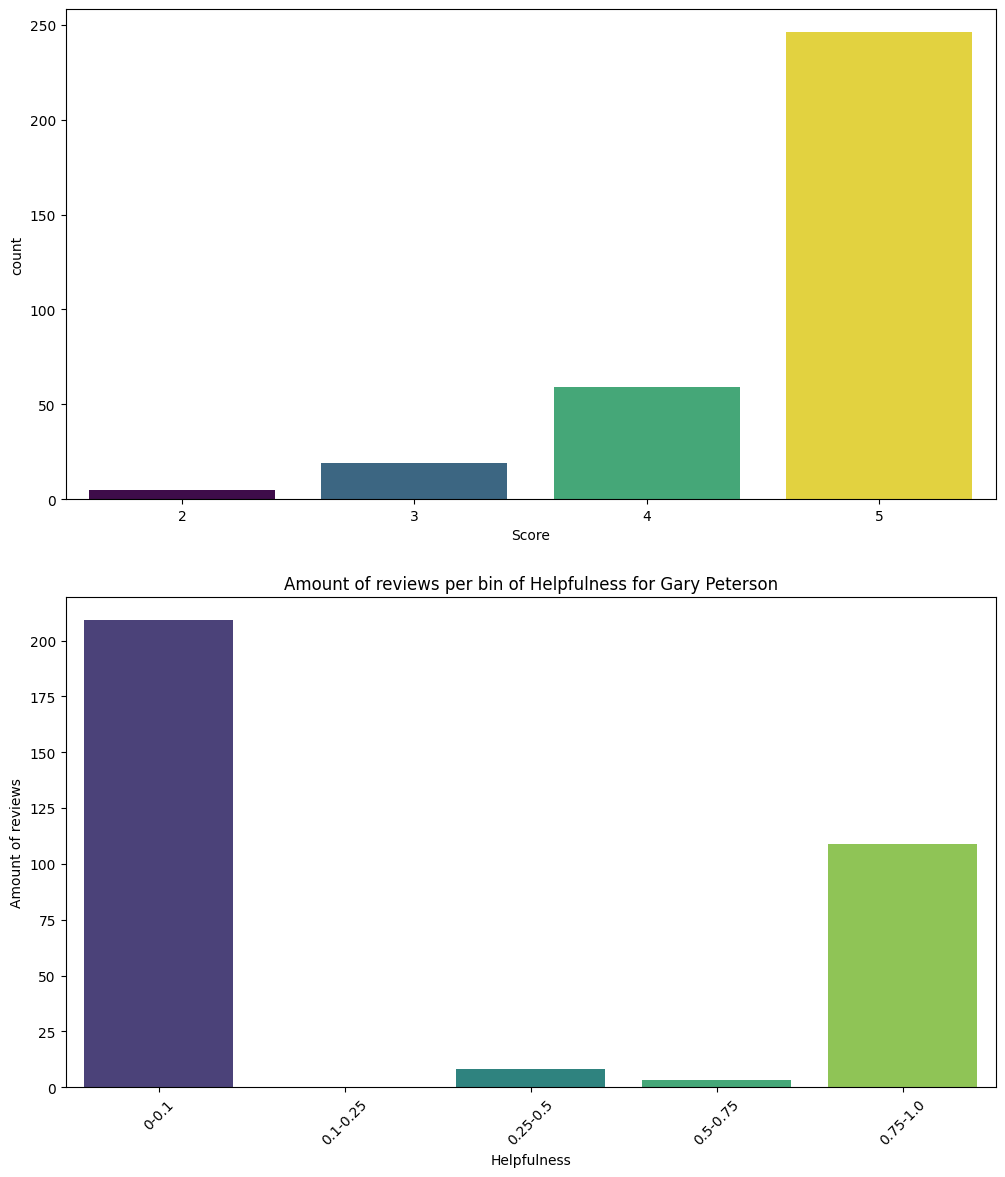

In [ ]:
# Bar plot of the reviews score for the one with the most reviews
fig, ax = plt.subplots(2, 1, figsize=(12, 14))
name = 'Gary Peterson'

# Filter for a specific reviewer if needed, e.g., 'Gary Peterson'
reviewer_data = reviews[reviews['ProfileName'] == name]

sns.countplot(data=reviewer_data, x = 'Score' , palette='viridis', hue = 'Score', legend=False, ax=ax[0])
plt.title(f'Amount of reviews per score for {name}')
plt.xlabel('Score')
plt.ylabel('Amount of reviews')



# Define bins for helpfulness in a more meaningful range
bins = [0, 0.1, 0.25, 0.5, 0.75, 1.0]
labels = ['0-0.1', '0.1-0.25', '0.25-0.5', '0.5-0.75', '0.75-1.0']

# Bin the helpfulness data
reviews['Helpfulness_Binned'] = pd.cut(reviews['Helpfulness'], bins=bins, labels=labels, include_lowest=True)

# Plot the data
sns.countplot(data=reviewer_data, x='Helpfulness_Binned', palette='viridis', legend=False, ax=ax[1])

plt.title(f'Amount of reviews per bin of Helpfulness for {name}')
plt.xlabel('Helpfulness')
plt.ylabel('Amount of reviews')
plt.xticks(rotation=45)
plt.show()

